In [3]:
import pandas as pd
import re
import spacy as spc
import matplotlib.pyplot as mat

In [ ]:
!python -m spacy download pl_core_news_lg

In [5]:
df = pd.read_csv('/content/dane8.csv')
nlp = spc.load('pl_core_news_lg')

In [ ]:
#Część I - przetwarzanie i oczyszczanie danych

In [6]:
df['created_at'] = df['created_at'].str.replace('Mon', 'Poniedziałek') \
    .str.replace('Tue', 'Wtorek') \
    .str.replace('Wed', 'Środa') \
    .str.replace('Thu', 'Czwartek') \
    .str.replace('Fri', 'Piątek') \
    .str.replace('Sat', 'Sobota') \
    .str.replace('Sun', 'Niedziela')

In [7]:
df['user_created_at'] = df['user_created_at'].str.replace('Jan', '01') \
    .str.replace('Feb', '02') \
    .str.replace('Mar', '03') \
    .str.replace('Apr', '04') \
    .str.replace('May', '05') \
    .str.replace('Jun', '06') \
    .str.replace('Jul', '07') \
    .str.replace('Aug', '08') \
    .str.replace('Sep', '09') \
    .str.replace('Oct', '10') \
    .str.replace('Nov', '11') \
    .str.replace('Dec', '12')

In [8]:
links_tweets = df['tweet_url'].tolist()

In [9]:
urls_without_nan = df.dropna(subset=['urls'])
urls_new = urls_without_nan['urls'].tolist()

In [10]:
media_without_na = df.dropna(subset=['media'])
media_new = media_without_na['media'].tolist()

In [11]:
stopwords = ['a', 'i', 'to', 'oraz', 'w', 'z', 'na']

df['text'].replace ('stopwords', '')

def no_stopwords(text):
    doc = nlp(text)
    return ' '.join([token.text for token in doc if not token.is_stop])

df['text_without_stopwords'] = df['text'].apply(no_stopwords)

In [ ]:
#Część 2 - eksploracyjna analiza danych

In [ ]:
top5_tweets_likes = df.nlargest(5, 'favorite_count')
top5_tweets_likes

In [ ]:
top5_tweets_retweets = df.nlargest(5, 'retweet_count')
top5_tweets_retweets

In [ ]:
non_sensitive_tweets = df[df['possibly_sensitive'] == True]
non_sensitive_tweets

In [ ]:
user_followers = df.nlargest (1,'user_followers_count')
user_followers

In [ ]:
verified_users_tweets = df[df['user_verified'] == True]
verified_users_tweets

In [ ]:
#Część 3 - przetwarzanie języka naturalnego

In [17]:
persons = []
locations = []
organizations = []

for entity in df['text']:
    doc = nlp(entity)
    persons_in_row = [ent.text for ent in doc.ents if ent.label_ == 'persName']
    locations_in_row = [ent.text for ent in doc.ents if ent.label_ == 'placeName']
    organizations_in_row = [ent.text for ent in doc.ents if ent.label_ == 'orgName']

    persons.append(persons_in_row)
    locations.append(locations_in_row)
    organizations.append(organizations_in_row)

df['persons'] = persons
df['locations'] = locations
df['organizations'] = organizations

In [ ]:
#Część 4 - rozwiązywanie problemów/umiejętność interpretowania dokumentacji

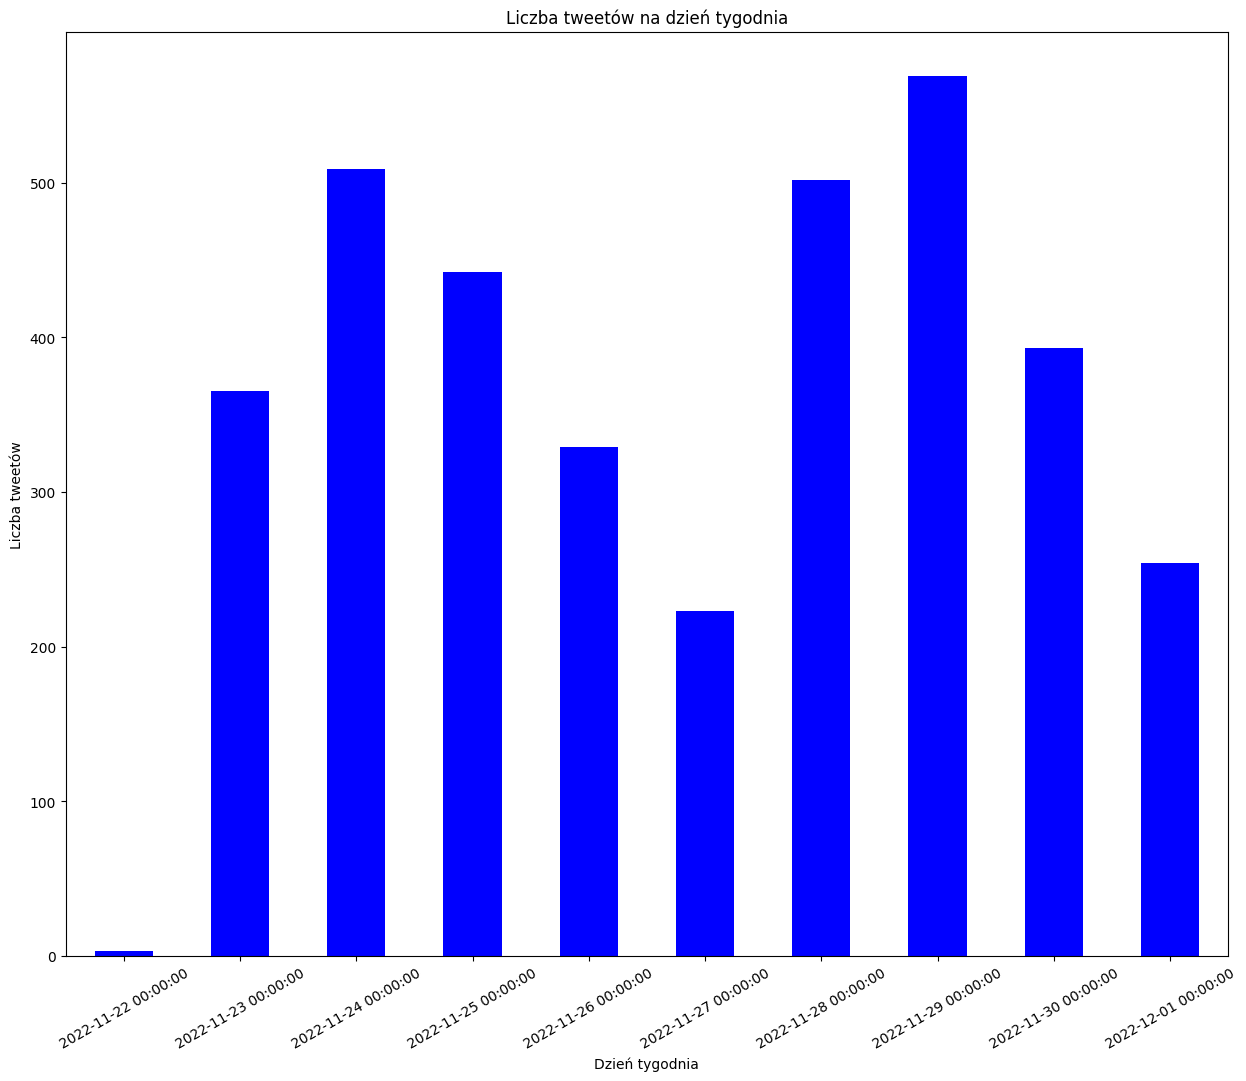

In [18]:
df = pd.read_csv('/content/dane8.csv')
data = {'created_at': ['Tue Jul 17 17:39:49 +0000 2018',
                              'Wed Jul 18 12:20:30 +0000 2018',
                              'Thu Jul 19 08:45:15 +0000 2018',
                              'Fri Jul 20 22:10:05 +0000 2018',
                              'Sat Jul 21 18:30:40 +0000 2018',
                              'Sun Jul 22 14:55:22 +0000 2018',
                              'Mon Jul 23 09:25:11 +0000 2018']}

df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

df.set_index('created_at', inplace=True)

mat.figure(figsize=(15, 12))
df.resample('D').size().plot(kind='bar', color='blue')
mat.title('Liczba tweetów na dzień tygodnia')
mat.xlabel('Dzień tygodnia')
mat.ylabel('Liczba tweetów')
mat.xticks(rotation=30)
mat.show()